In [19]:
import matplotlib.pyplot as plt
import timeit
from solcast_frames.latlng import LatLng
from solcast_frames.radiationframehandler import RadiationFrameHandler
from solcast_frames.powerframehandler import PowerFrameHandler

import pandas as pd
import datetime
# import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP

In [13]:
plt.interactive(False) # Turn this off to create plots
location = LatLng(lat=-33.86785, lng=151.215256, name="Sydney", tag="No wild Koalas", timezone="Australia/Sydney")
print(location.desc())

Name: Sydney Tag:No wild Koalas [-33.867850, 151.215256] TimeZone: Australia/Sydney


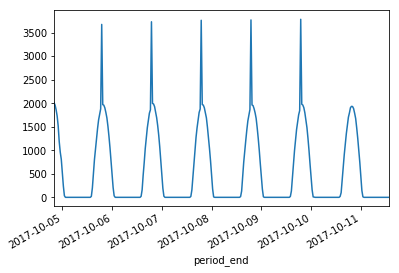

In [20]:
#  Plot the power `pv_estimate`
# Required fields latlng valid position, capacity as integer > 0
# Adding in an optional keyword argument of an azimuth of 0
# The following optional keyword arguments are recognized by the solcast-py library
# azimuth | range: [-180 to 180] default: 0 in Southern Hemisphere, 180 in Northern Hemisphere
# tilt | range: [0 to 90] | default: 23
# install_date | format: yyyyMMdd Will be ignored if a loss_factor is supplied
# latest | [True, False] | default False
power_estimated_actuals = PowerFrameHandler.estimated_actuals(location, 5000, azimuth=0)
power_estimated_actuals.pv_estimate.plot()
plt.show()

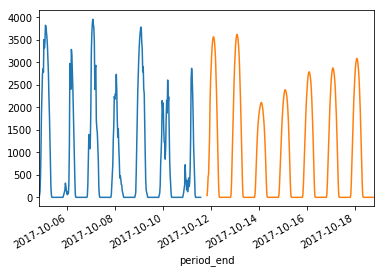

In [15]:
# Plot the power `pv_estimate`
# Required fields latlng valid position, capacity as integer > 0
# The following optional keyword arguments are recognized by the solcast-py library
# azimuth | range: [-180 to 180] default: 0 in Southern Hemisphere, 180 in Northern Hemisphere
# tilt | range: [0 to 90] | default: 23
# install_date | format: yyyyMMdd Will be ignored if a loss_factor is supplied
# loss_factor | [0 to 1] | default 0.9
fx_solcast_power = PowerFrameHandler.forecast(location, 5000)
fx_solcast_power.pv_estimate.plot()
plt.show()

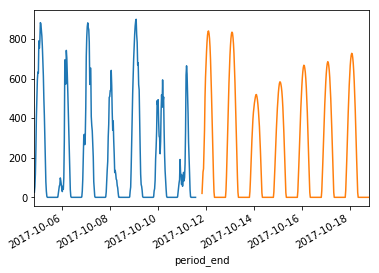

In [16]:
# Plot the radiation `ghi` field
# Required fields latlng valid position
# The following optional keyword arguments are recognized by the solcast-py library
# latest | [True, False] | default False
radiation_estimated_actuals = RadiationFrameHandler.estimated_actuals(location,api_key = API_KEY)
radiation_estimated_actuals.ghi.plot()
# Plot the radiation `ghi` field
# Required fields latlng valid position
fx_solcast_radiation = RadiationFrameHandler.forecast(location)
fx_solcast_radiation.ghi.plot()
plt.show()

In [17]:
#
# Following code is from http://pvlib-python.readthedocs.io/en/latest/forecasts.html
#

Name: Tucson Tag:Cactus Land [32.200000, -110.900000] TimeZone: US/Arizona
Solcast Radiation Forecast Location: Tucson Time: 0.617759 (seconds)
pvlib (GFS) Radiation Forecast Location: Tucson Time: 6.108818 (seconds)


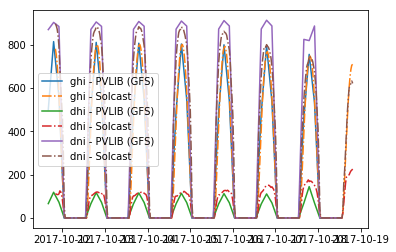

In [18]:
# Changing the location pvlib default model uses Tucson for examples
location = LatLng(lat=32.2, lng=-110.9, name="Tucson", tag="Cactus Land", timezone="US/Arizona")
print(location.desc())

start_time = timeit.default_timer()
radiationForecast = RadiationFrameHandler.forecast(location)
elapsed = timeit.default_timer() - start_time
print("Solcast Radiation Forecast Location: %s Time: %s (seconds)" % (location.name, '%.6f' % elapsed))

# specify time range with timezone
start = pd.Timestamp(datetime.date.today(), tz=location.timezone)
end = start + pd.Timedelta(days=7)

start_time = timeit.default_timer()
# fx is a common abbreviation for forecast
fx_model = GFS() # From Forecast models http://pvlib-python.readthedocs.io/en/latest/api.html#forecast-models
fx_data = fx_model.get_processed_data(location.lat, location.lng, start, end)
elapsed = timeit.default_timer() - start_time
print("pvlib (GFS) Radiation Forecast Location: %s Time: %s (seconds)" % (location.name, '%.6f' % elapsed))


plt.plot(fx_data.ghi, label="ghi - PVLIB (GFS)")
plt.plot(radiationForecast.ghi, label="ghi - Solcast", linestyle='dashdot')

plt.plot(fx_data.dhi, label="dhi - PVLIB (GFS)")
plt.plot(radiationForecast.dhi, label="dhi - Solcast", linestyle='dashdot')

plt.plot(fx_data.dni, label="dni - PVLIB (GFS)")
plt.plot(radiationForecast.dni, label="dni - Solcast", linestyle='dashdot')

plt.legend()
plt.show()